In [16]:
import sqlite3
import pandas as pd
pd.options.display.max_rows = 999

# Consultar datos
conn = sqlite3.connect('sp500.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM acciones")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df = pd.DataFrame(filas, columns=column_names)
df.head(3)

,id,symbol,shortName,sector,country,fullTimeEmployees,auditRisk,overallRisk,dividendYield,payoutRatio,fiveYearAvgDividendYield,beta,forwardPE,averageVolume,marketCap,ebitdaMargins,earningsGrowth,returnOnEquity
0,6,MMM,3M Company,Industrials,United States,61500.0,1.0,9.0,2.02,0.4972,4.28,1.017,18.334177,4099218.0,7.811482e+10,0.22258,-0.217,0.91851
1,7,AOS,A.O. Smith Corporation,Industrials,United States,12700.0,5.0,10.0,2.07,0.3581,1.72,1.177,16.120392,1395768.0,9.416937e+09,0.20364,-0.181,0.28627
2,8,ABT,Abbott Laboratories,Healthcare,United States,114000.0,7.0,6.0,1.80,0.2880,1.66,0.693,25.352715,6767804.0,2.268837e+11,0.25540,4.794,0.30906


In [ ]:
df = df.drop(df[df["beta"].isna()].index)  # Eliminar filas con valores nulos en shortName
df.isna().sum()  # Verificar si hay valores nulos

id                            0
symbol                        0
shortName                     0
sector                        0
country                       0
fullTimeEmployees             6
auditRisk                     5
overallRisk                   5
dividendYield                92
payoutRatio                   0
fiveYearAvgDividendYield    103
beta                          0
forwardPE                     0
averageVolume                 0
marketCap                     0
ebitdaMargins                 0
earningsGrowth               76
returnOnEquity               27
dtype: int64

In [18]:

df = df.fillna(0)  # Reemplazar valores nulos por 0

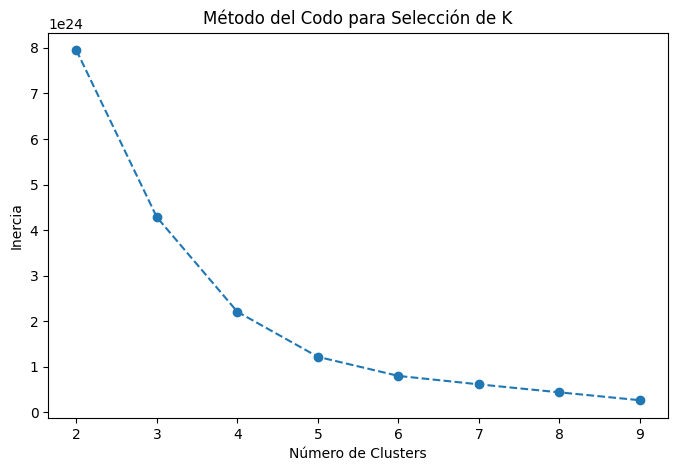

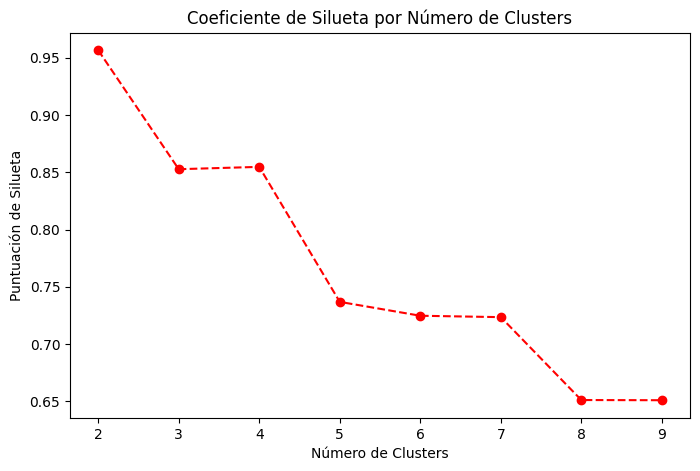

C:\Users\carre\AppData\Local\Temp\ipykernel_3456\3929309827.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster_KMeans'] = kmeans.fit_predict(features)
C:\Users\carre\AppData\Local\Temp\ipykernel_3456\3929309827.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Cluster_DBSCAN'] = dbscan.fit_predict(features)
C:\Users\carre\AppData\Local\Temp\ipykernel_3456\3929309827.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

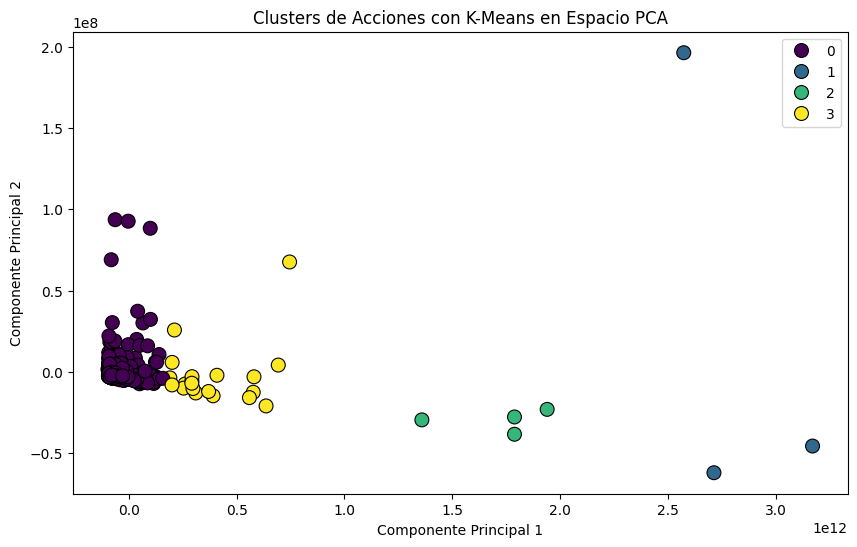

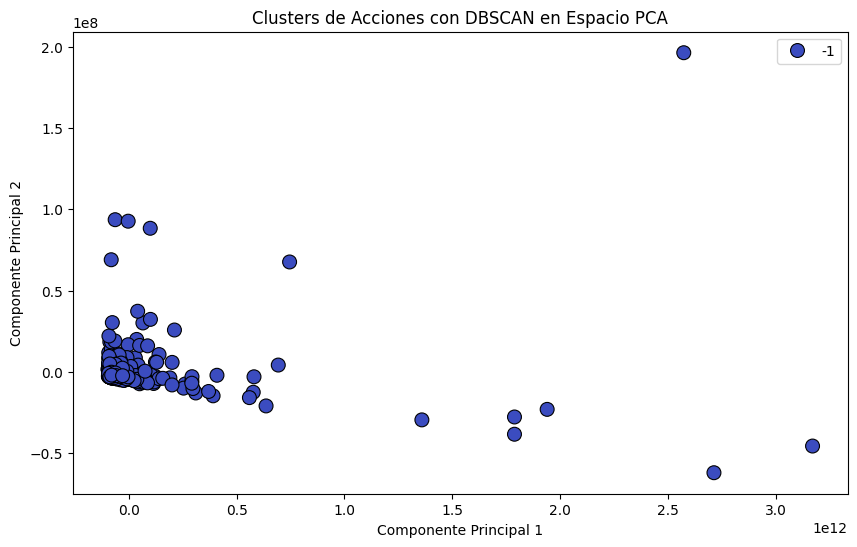

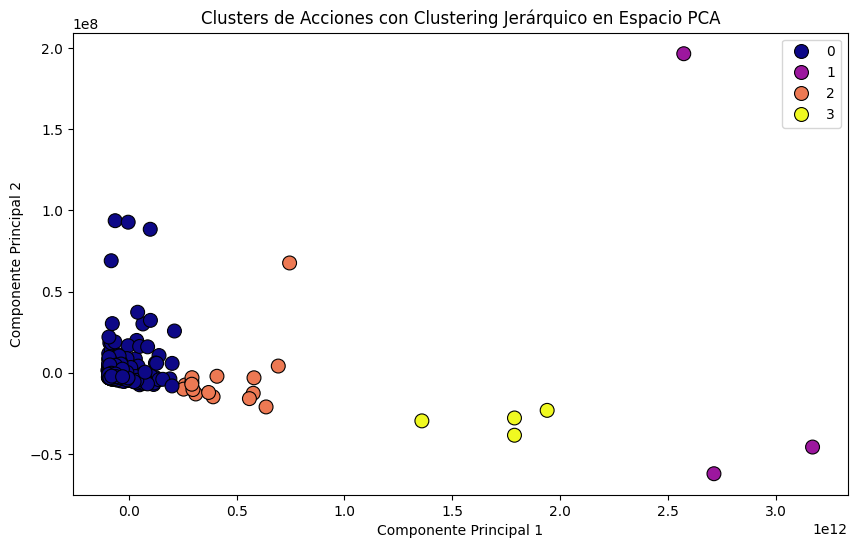

Clustering con K-Means, DBSCAN y Jerárquico completado y guardado.


In [19]:
# Notebook 4: Clustering de Acciones (K-Means, DBSCAN y Jerárquico)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Cargar las features procesadas
features = ["fullTimeEmployees","auditRisk","overallRisk","dividendYield","payoutRatio","fiveYearAvgDividendYield","beta","forwardPE","averageVolume","marketCap","ebitdaMargins","earningsGrowth","returnOnEquity"]
features = df[features]
# Determinar número óptimo de clusters con el método del codo
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para Selección de K")
plt.show()

# Determinar número óptimo de clusters con el coeficiente de silueta
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Número de Clusters")
plt.ylabel("Puntuación de Silueta")
plt.title("Coeficiente de Silueta por Número de Clusters")
plt.show()

# Aplicar K-Means con el número óptimo de clusters (suponiendo K=4 basado en los gráficos)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
features['Cluster_KMeans'] = kmeans.fit_predict(features)

# Aplicar DBSCAN para clustering basado en densidad
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Ajustar eps según los datos
features['Cluster_DBSCAN'] = dbscan.fit_predict(features)

# Aplicar Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4)
features['Cluster_Hierarchical'] = hierarchical.fit_predict(features)

# Visualización de clusters con PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features.drop(columns=['Cluster_KMeans', 'Cluster_DBSCAN', 'Cluster_Hierarchical']))
features['PCA1'] = pca_result[:, 0]
features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=features, palette='viridis', s=100, edgecolor='black')
plt.title("Clusters de Acciones con K-Means en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_DBSCAN', data=features, palette='coolwarm', s=100, edgecolor='black')
plt.title("Clusters de Acciones con DBSCAN en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Hierarchical', data=features, palette='plasma', s=100, edgecolor='black')
plt.title("Clusters de Acciones con Clustering Jerárquico en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

# Guardar los resultados de clustering
features.to_csv("features_clusters_comparacion.csv")

print("Clustering con K-Means, DBSCAN y Jerárquico completado y guardado.")